Осциллятор Дуффинга

Этот код имитирует осциллятор затухания:

Осциллятор с затухающими гармониками в двухъямном потенциале.

$F = -\gamma*\frac{dx}{dt} + 2*a*x - 4*b*x^3 + F_0*\cos{(\omega*t)}$

Нелинейное дифференциальное уравнение второго порядка, решенное численно с помощью разложения Тейлора.

Для текущего набора параметров движение хаотическое, т.е. движение сильно зависит от начальных условий. 

Дополнительно фиксированного периода движения не наблюдается. Сюжет Пуанкаре - фрактал.

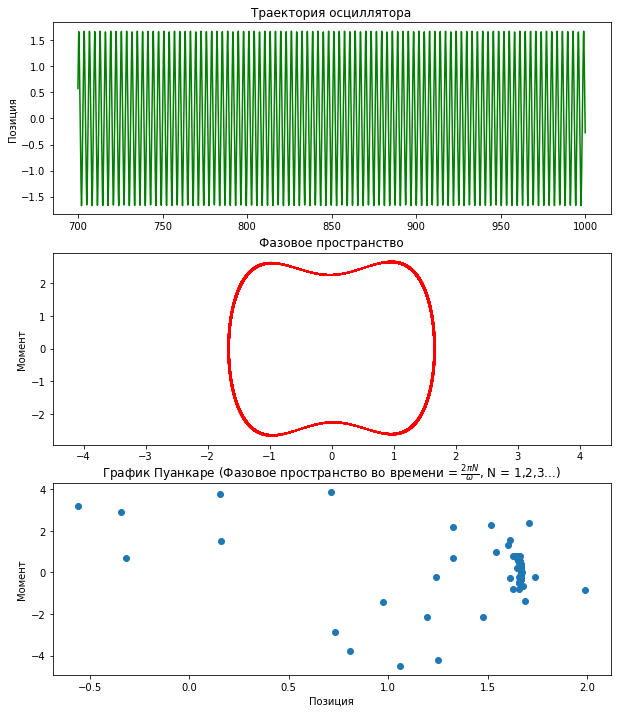

In [6]:
from numpy import * 
from matplotlib.pyplot import * 
from matplotlib import pyplot as plt


# Получение точек фазового пространства в целых кратных периодах для графика Пуанкаре
def Strange_Attractor(Position,Velocity,T,Period,t,h):
    
    M, k = zeros([int(T/Period),2]), 1

    for i in range(len(t)):
        if abs(t[i]-k*Period)<h:
            M[k-1,0] = Position[i]
            M[k-1,1] = Velocity[i]
            k += 1

    return M

# Осциллятор Дуффинга
def Duffing(x,v,a,b,Omega,Gamma,F_0,T,h,Period,t):

    # --------- Вспомогательные функции ---------
    
    def x_2(x,v): return -Gamma*v + 2.0*a*x - 4.0*b*x*x*x
    def x_3(x2,x,v): return -Gamma*x2 + 2.0*a*v -12.0*b*x*x*v
    def x_4(x3,x2,x,v): return -Gamma*x3 + 2.0*a*x2 -12.0*b*x*x*x2 - 24.0*b*v*v*x
    def x_5(x4,x3,x2,x,v): return -Gamma*x4 + 2*a*x3 -12.0*b*(x*x*x3 + 2.0*x2*x*v) -24.0*b*(v*v*v+2*x*v*x2)

    # Тригонометрические члены в производных. Оценить перед циклом
    x2F = F_0*cos(Omega*t)
    x3F = -F_0*Omega*sin(Omega*t)
    x4F = -F_0*Omega*Omega*cos(Omega*t)
    x5F = F_0*Omega*Omega*Omega*sin(Omega*t)

    # Коэффициенты перед разложением в ряд Тейлора
    coef1 = 0.5*h**2.0
    coef2 = 1.0/6.0*h**3.0
    coef3 = 1.0/24.0*h**4.0
    coef4 = 1.0/120.0*h**5.0

    # Резервируем
    Position, Velocity = zeros(len(t)) , zeros(len(t))
    Position[0] = x

    # Считаем
    for i in range(1,len(t)):

        # Считаем промежуточные значения
        d2 = x_2(x,v) + x2F[i]
        d3 = x_3(d2,x,v) + x3F[i]
        d4 = x_4(d3,d2,x,v) + x4F[i]
        d5 = x_5(d4,d3,d2,x,v) + x5F[i]
    	
        # Разложение в ряд Тейлора для x, v. Заказать h ^ 5
        x += v*h + coef1*d2 + coef2*d3 + coef3*d4 + coef4*d5
        v += d2*h + coef1*d3 + coef2*d4 + coef3*d5
    	
        # Добавляем полученные значения
        Position[i], Velocity[i] = x , v

    # Возвращаем траекторию осциллятора и его фазовое пространство
    return Position, Velocity


# Настройка отрисовки
def GridConf(Title,Positions,xText,yText): subplot(3,1,Positions); xlabel(xText); ylabel(yText); title(Title)

if __name__ == "__main__":

    # --- --- --- Блок входных параметров --- --- ---

    x,v = 0.5, 0                    # Первоначальные условия
    T = 1000                        # Продолжительность моделирования
    h = 1e-1                        # Шаг времени

    F_0 = 2.5                       # Для хаоса а = 0.5 и b = 0.0625
    a, b = 1, 1		                # Для простого случая а = 0 и b = 1
    Omega, Gamma = 2.0, 0.1         
    

    # --- --- --- --- Реализация --- --- --- ---

    Period = 2*pi/(1.0*Omega)       # Считаем период
    t = arange(0,T,h)               # Временой ряд

    # Применяем осциллятор Дуффинга
    Position, Velocity = Duffing(x,v,a,b,Omega,Gamma,F_0,T,h,Period,t)
    
    plt.figure(figsize=(10, 12))
    # Траектория осциллятора
    GridConf('Траектория осциллятора',1,'','Позиция')
    plot(t[-3000:],Position[-3000:],'g-')

    # Фазовое пространство
    GridConf('Фазовое пространство',2,'','Момент')
    plot(Position[-3000:],Velocity[-3000:],'r-')
    xlim([-4.5,4.5])

    # Получите точек фазового пространства в целых кратных периодах для графика Пуанкаре
    Strange = Strange_Attractor(Position,Velocity,T,Period,t,h)

    # График Пуанкаре
    GridConf(r'График Пуанкаре (Фазовое пространство во времени = $\frac{2\pi N}{\omega}$, N = 1,2,3...)',3,'Позиция','Момент')
    scatter(Strange[:,0],Strange[:,1])

    # Рисуем
    show()